# Coursework Advanced Optimisation

---
---

**Author:** Dr Giordano Scarciotti (g.scarciotti@imperial.ac.uk) - Imperial College London 

**Module:** ELEC70066 - Advanced Optimisation

**Version:** 1.1.0 - 12/01/2023

---
---

# The problem and data

In pattern recognition and classification problems we are given two sets of points in $\mathbb{R}^n$, $\{x_1,\dots,x_N\}$ and $\{y_1,\dots,y_M\}$, and wish to find a function $f : \mathbb{R}^n \to \mathbb{R}$ (within a given family of functions) that is positive on the first set and negative on
the second, i.e.,

$$
f(x_i) > 0,\quad i = 1,\dots,N, \qquad f(y_i) < 0,\quad i = 1, \dots ,M.
$$

If these inequalities hold, we say that $f$ separates, classifies, or discriminates the two sets of points. This is an instance of supervised learning.

In the next subsections you will find $4$ datasets which will be used in the questions below. For datasets $1$, $2$ and $3$ you are given a "train set" and a "test set". You are supposed to develop your optimisation algorithm only on the train set. Do not use the test set for training/optimisation. The purpose of the test set is for you to test a posteriori how the classifier that you have obtained performs. For data set $4$, use the entire set in the optimisation (i.e. there is no test phase).

### Dataset 1

In [952]:
# Dataset 1. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_1 = np.array([[ 1.75038375,  1.36985822,  0.73076475,  0.73666559,  0.34224149,
         1.09826685,  0.86211442,  1.24674778,  0.12887349,  0.35909321,
         0.35246291,  0.63681688,  0.54697422,  0.76350366,  1.5921626 ,
         0.51972449,  1.09117696,  1.42626192,  1.06227916,  0.21480643,
         1.42300815,  0.84256355,  1.7533684 ,  0.69974175,  0.76946708,
        -0.18379672,  1.0485532 ,  0.96472069,  1.31625354,  0.36578051,
         0.77772201,  1.64143191],
       [-0.16275141, -0.82300504, -1.30848519, -0.99270645, -1.81370696,
         2.8696898 , -1.06625993, -0.73442029,  0.50866809, -0.99408544,
         0.40021373, -0.10562573,  0.30068813, -0.18723889,  1.5299066 ,
         0.23149303,  0.21033337, -0.37766466,  1.7832445 ,  0.77048214,
         2.38601163, -0.12591569,  0.58083659, -0.21862494,  1.21901444,
        -0.70226941,  1.82745304,  1.02706123, -1.21456594, -0.04151123,
         0.57038679,  0.37708978]]).T

Y_train_1 = np.array([[-1.61978158, -1.42158013, -1.10032926, -0.84133058, -1.61746142,
        -1.37001245, -0.81530917, -2.19997218, -1.17612194,  0.28991103,
        -1.15223907, -0.20748713, -0.26374853, -1.38338996, -0.60422153,
        -0.6807668 , -0.49697651, -1.76927614, -1.07011443, -2.13637377,
        -0.97815482, -1.38615705,  0.16678405, -0.20236665, -0.52664181,
        -0.52065308, -1.06395708, -0.09375681],
       [ 1.29534095,  0.70877882,  0.22482794, -1.4081337 , -0.63963762,
         0.70944757, -0.21818498, -0.87909018,  0.23087154,  1.26274235,
         0.23315878, -1.08721924,  0.46586729, -0.64121136, -0.844737  ,
        -0.18690388, -0.71034608, -0.98534397,  0.18144543, -0.8120575 ,
         0.00244075, -0.28833748,  1.3720753 ,  0.34245524,  1.1515264 ,
         1.11200279,  0.38977343,  0.3943303 ]]).T

X_test_1 = np.array([[ 1.21290648,  0.60647149,  1.21197796,  1.54724686,  1.00972903,
         0.56216029,  0.72973515,  0.39284694,  0.17336897,  0.74244925,
         0.6168276 ,  0.91094238,  0.75389832,  1.22221484,  0.60651985,
         0.54111179,  0.91559423,  0.25201646],
       [-0.71869421, -1.12772433, -0.58861397, -0.0145585 , -1.45496704,
        -1.37186247,  0.35988092,  1.00862714,  0.30279016,  2.55054793,
         2.28438069, -0.35502465, -0.9418674 ,  0.89477983, -1.14724826,
        -0.7799858 ,  1.06303296, -0.55712765]]).T

Y_test_1 = np.array([[-1.19236589, -1.10995069,  0.37669071, -0.95531888, -0.89232474,
        -0.02095101, -0.29050649, -0.37881187, -0.99739798, -1.20639358,
        -0.54710686, -0.25815146, -1.136852  , -0.99897624, -0.78183458,
         0.21608231, -1.39421902, -0.85569085, -0.25452413, -2.08591412,
        -0.7539892 , -0.49801935],
       [-1.09011136,  1.87167148, -1.63772617, -0.20106049, -1.30309817,
         1.05833253, -0.04721317, -1.6502976 , -0.36833975, -1.2191319 ,
        -0.75123888,  0.43614121, -0.09030079, -1.32835851, -0.10259796,
        -0.04046664,  0.06085472,  0.119087  ,  0.81613417, -0.55277698,
        -1.03559666,  0.55011099]]).T

### Dataset 2

In [953]:
# Dataset 2. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_2 = np.array([[-1.614901  ,  0.28714288, -1.58856523, -0.62398345, -1.24054186,
         1.3540726 , -1.8376991 , -0.76542848,  1.01551298,  1.56603302,
        -1.03332383, -0.65191468,  0.08107311,  1.1886501 ,  1.55395519,
         1.85121256, -0.38917117,  1.60296587, -1.29848704,  0.8441058 ,
         1.51105349,  1.30539824, -1.78357771, -0.07797286, -1.94890625,
        -0.67010608,  1.26205438, -0.64744794,  1.49213191, -1.32792377,
         0.40606432,  1.1654875 , -1.39691976, -1.53382165],
       [-0.74107291,  2.0226272 , -0.80311089, -1.93652965,  0.93944489,
        -0.76972033,  0.4438167 , -1.28950516, -0.54197248, -0.68859753,
         0.84952455, -1.46468159,  0.89980228, -0.73998096, -1.24199011,
        -0.004975  ,  1.22250794,  0.6042052 , -0.09834692,  1.90774378,
         1.21666545, -1.52465769,  1.46776645, -1.48563138,  0.92646412,
        -2.35182561,  1.08872015,  1.50066709,  1.54360638,  0.08300261,
         1.46244545,  0.42036718, -1.16291727,  1.21058973]]).T

Y_train_2 = np.array([[ 0.33752225,  0.26007797, -0.77360943, -0.80707957, -1.02059109,
         1.21402308, -1.05628487, -0.44228055, -0.40975282, -0.58552875,
         0.73242037,  0.60985187, -0.38448676, -1.10713613,  0.71019777,
         0.42445554,  0.54032669,  0.16261397, -0.7642942 , -0.0826362 ,
        -0.01755153, -1.33428073, -0.05495925,  0.971422  , -0.11024436,
         0.46940181],
       [ 0.1972156 , -0.40692781, -0.21251355, -0.38086556,  0.55460174,
        -0.00750315, -0.08248651,  0.79141975, -0.76573106,  0.28460164,
         0.75396732,  0.23217386,  0.97141896, -0.63721127,  0.41754396,
        -1.47865265, -0.11135927, -0.18183213, -0.03324034,  0.56319091,
        -0.84912994,  0.28134522,  0.52742495, -0.26947631,  0.44022805,
         0.77060324]]).T

X_test_2 = np.array([[-1.18919052,  1.86146486,  0.73290109, -1.02598963, -1.94986405,
         1.98413584, -0.22543794,  1.6738425 , -0.54083103,  0.23855336,
         0.29067775,  0.90452835, -0.7807143 ,  0.92563898,  0.5891893 ,
        -1.8506076 ],
       [ 1.01734226,  1.22983793, -1.32784027, -1.25200345, -1.11164531,
         0.11500191,  1.37788957, -0.04001507, -1.45583732,  1.64623486,
        -1.5711447 , -1.27852394,  1.32218203,  1.77824856, -1.83015366,
        -1.32219896]]).T

Y_test_2 = np.array([[ 0.44030401, -0.96934769,  0.83688707,  0.42107823, -0.64710246,
        -0.80688878, -0.17615909, -0.07870086,  0.37287753,  1.24256423,
        -0.07644516,  0.91728516,  1.4185267 , -0.57032662,  0.32910968,
        -0.62365553,  0.04200134, -0.05018494, -0.25026012,  0.30984256,
         0.13336253,  0.92133881, -0.76288057,  0.45065785],
       [ 0.9436088 , -0.72879255, -0.54252464, -0.95075636, -0.13248588,
        -0.59037888,  1.37253857,  0.75478021, -0.65673396, -0.31060961,
         0.37673711,  0.94192255, -0.24612582,  0.90276183, -0.88489523,
         0.05975249, -1.13783772, -0.72226809,  0.80242032,  0.47174672,
        -0.8985866 ,  0.59402413, -0.07023891, -0.97869024]]).T

### Dataset 3

In [954]:
# Dataset 3. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_3 = np.array([[ 0.30920485,  0.74779523, -1.19805934, -1.4065875 ,  0.81773837,
        -1.30667592, -0.22120141,  0.07813527, -0.42443599,  0.03138162,
        -2.02716273, -0.20216417, -1.77093289,  0.19895122,  0.27524467,
        -0.9843448 , -0.31251963, -1.72018154, -2.05161935, -0.81445041,
         0.75566503, -1.61181827,  0.24942261,  0.43094924,  0.26285439,
        -1.49128776, -1.2378428 ,  0.15350841, -1.63601617, -0.03734756,
        -0.22413227],
       [-0.127041  ,  0.54957438,  1.40047603, -1.03687185,  1.64300265,
        -0.60711187,  1.00868763,  0.18433247,  1.30854456,  1.27867747,
        -0.07552655,  0.09829492, -0.15602456,  2.27694191,  0.58976897,
         1.29546509,  1.85361272, -0.11323539,  0.3295589 ,  0.03881959,
         0.62671139, -1.16122353,  0.37041953, -0.51610516,  0.08970487,
         0.68265883,  0.7264372 ,  0.8912278 ,  1.14409337,  0.53962298,
         0.94477311]]).T

Y_train_3 = np.array([[-0.48691402,  0.50954902,  1.35242892,  1.89600064, -0.33075371,
        -0.62663858, -0.85151619, -0.59739923,  0.15581821,  0.24130156,
         0.0081454 ,  1.01975478,  1.22467352,  0.51038341,  0.88796385,
         0.15940018, -0.1636123 ,  1.53916295, -0.6851801 , -0.42081847,
        -0.36004546,  1.10877664,  1.82124821, -0.04156698,  0.23092986,
         1.85584796, -0.34194837,  0.89063568, -0.99471418],
       [ 0.57259859, -1.66427178,  0.60859541, -0.42653506, -0.55325533,
        -0.45097084, -0.06022663,  0.27829883, -1.14573741, -1.74371889,
        -0.58656254, -0.39964896, -1.45537741, -1.09925804, -1.22007405,
        -1.05506347, -1.53782127, -0.40646646,  0.56462893, -1.03126372,
         0.03132026, -0.56596703, -0.46607732, -0.71850484, -1.16563865,
         0.39711336, -0.50298565, -0.73843955, -0.7858591 ]]).T

X_test_3 = np.array([[-1.55182484, -1.14359579, -0.28724359,  0.4860189 ,  0.59348201,
         0.20764271, -0.71978547, -0.52880272, -0.83190068, -0.17344159,
         0.11892081, -1.55268459, -0.97786341,  1.15004209, -1.55962329,
        -0.98048598, -0.73153577, -0.75993791, -0.22465612],
       [ 0.46910804,  0.76280671,  1.0525906 ,  1.96041925,  0.25278868,
         0.88856402,  1.72334673,  1.28542054,  0.93244079,  1.50362044,
         0.14210094, -0.3087488 ,  1.51041733, -0.46423271, -0.26480295,
         0.8478617 ,  1.24236135,  1.31112526,  1.70271788]]).T

Y_test_3 = np.array([[ 0.59260113, -0.87894137, -0.02974639,  1.7173351 , -0.09130345,
         1.31650323,  0.3712312 ,  1.39730283,  1.12756772,  0.62682189,
        -0.34408365,  1.33380816,  1.89457786, -0.31784745,  1.37086214,
         1.69531142, -0.53631325,  1.60097254,  0.98840214,  1.81872078,
         0.67050908],
       [-1.44842808,  0.65349306, -0.63475756, -0.17875463, -0.93824346,
        -1.10788814, -1.30192489,  0.39040035, -1.65289561, -2.14337167,
        -0.11501714, -0.73018114, -1.57392425, -1.493817  ,  0.22375044,
        -0.91174565, -0.20549059, -0.09531556, -1.75933045,  0.7346544 ,
        -1.01221609]]).T

### Dataset 4

In [955]:
# Dataset 4. DO NOT CHANGE THE NUMBERS
import numpy as np
X_4 = np.array([[ 3.496052,  4.042794,  2.79643 ,  5.085416,  4.240754,  3.737034,
         3.343466,  3.786328,  4.965464,  3.826312,  4.208512,  4.620014,
         3.242036,  5.14892 ,  2.50782 ,  3.528098,  4.719288,  5.184396,
         5.086984,  3.900596],
       [-2.938138,  0.507444,  2.100728, -0.066346,  0.308112,  1.280272,
         3.851106,  0.200998,  0.104566, -1.468236, -2.356998,  2.863952,
         1.513512, -2.811326,  1.007538,  1.21716 ,  1.255772,  1.17943 ,
        -2.121112, -0.276458]]).T

Y_4 = np.array([[-4.47517 , -3.616592, -3.222338, -1.616118, -5.363638, -3.54466 ,
        -1.163848, -1.032822, -1.36367 , -1.990576, -1.959902, -0.24304 ,
        -1.288602, -0.81389 , -1.89679 , -1.068004, -2.55192 , -4.272996,
        -1.77429 ,  0.303408],
       [ 2.363466,  4.178916,  2.78908 ,  0.5145  ,  1.867194,  2.923438,
         4.613742,  0.950796,  0.377692,  1.884344,  1.461572, -0.978432,
         3.36434 ,  2.866108,  3.021634,  1.55918 ,  1.496068,  1.593088,
         2.453626,  1.409632]]).T

Z_4 = np.array([[ 1.710198,  2.58181 ,  0.581826, -2.765266,  2.969792,  1.069866,
        -1.743714,  1.217356,  2.143554, -2.254784, -3.259284,  2.706466,
         0.898268,  0.058898, -2.59896 , -3.25409 ,  4.040442, -3.34033 ,
        -3.096212, -0.716478],
       [-3.13698 , -4.892258, -3.686858, -4.64716 , -4.04887 , -3.83376 ,
        -4.468408, -4.850902, -3.36238 , -4.180288, -6.078254, -4.428228,
        -3.690582, -4.903822, -4.286912, -4.954782, -3.865414, -3.960376,
        -5.242314, -2.98557 ]]).T

# Questions

0.   Read Section $8.6$ of $[1]$.
0.   Read Section $8.6$ of $[1]$.
1.   For dataset $1$, determine a standard support vector classifier with $\gamma = 0.1$ (notation from Section $8.6$ of the book). Plot the points, the classifier $f$ and the associated slab. **[10 marks]**

2.   Use the test set to assess how good the classifier is on unseen data. To this end, first define a "metric" (or more than one if you prefer) which numerically quantifies how good or bad a classifier is. Explain why you picked this metric and how the metric works. **[10 marks]**

3.   Discuss, possibly with the help of figures, the role of the parameter $\gamma$ and find for which $\gamma$ (or $\gamma$'s) your classifier behaves best on the test set. **[10 marks]**

4.   Now determine a linear classifier by approximating it via logistic modeling. Compare and discuss the results with those obtained in parts 1. 2. and 3. **[10 marks]**

5.   For dataset $2$, determine a standard support vector classifier with $\gamma=0.1$. Plot the points, the classifier $f$ and the associated slab. Score your classifier on the test set using your metric. **[5 marks]**

6.   Implement nonlinear classifiers for dataset $2$. There are many options here. Discuss as much as you can and try to find the best classifier among those which are obtainable by means of convex optimisation. The more details you provide to explain how you reached your final choice, the better. **[25 marks]**

7.   Repeat parts 5. and 6. on dataset 3. **[15 marks]**

8.   Dataset $4$ consists of three sets of points corresponding to three classes instead of two. Explain how you would go about finding a classifier for this case. Try to find a classifier and plot the points and the classifiers. Describe your results. **[15 marks]**

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt


# Q1


1.   For dataset $1$, determine a standard support vector classifier with $\gamma = 0.1$ (notation from Section $8.6$ of the book). Plot the points, the classifier $f$ and the associated slab. **[10 marks]**

Define a function to solve the svm classifier optimization problem

In [957]:
def svm_classifier(X, Y, gamma):
    # Get dimensions
    n_samples_x, n_features = X.shape
    n_samples_y, n_features = Y.shape

    # Define variables we want to find
    a = cp.Variable(n_features)
    b = cp.Variable(1)
    u = cp.Variable(n_samples_x)
    v = cp.Variable(n_samples_y)
    
    # Define problem
    obj = cp.Minimize( cp.norm(a,2) + gamma * (cp.sum(u) + cp.sum(v))   )

    # Set constraints
    constraints = [a.T@ X.T - b >= 1-u,
                a.T@ Y.T - b <= -(1-v),
                    u >= 0, v>=0 ]

    prob = cp.Problem(obj, constraints)
    prob.solve()

    # Return the values of each variable
    return a.value,b.value,u.value,v.value, obj.value


Define function to plot points, hyperplane and slab

In [958]:
def plot_svm(X,Y, a, b,x_lims, y_lims, title):

    # To plot the hyperplane we need the slope of the hyperplanae line, and its intercept
    slope = -a[0] / a[1] # slope = negative reciprocal of the slope of the line a
    intercept = -b / a[1] # value of y when x=0

    # Compute the margin - distance between hyperplane and slab edges
    slab_width = 2 / np.linalg.norm(a,2) 


    # Select the points inside the slab
    slab_x = np.linspace(x_lims[0], x_lims[1], 100) # x coordinates of slab
    upper_slab_y = slope * slab_x + intercept + slab_width/2 # y coordinates of upper slab
    lower_slab_y = slope * slab_x + intercept - slab_width/2 # y coordinates of lower slab
    hyperplane_y = slope * slab_x + intercept

    # Plot the training points with different colors and labels
    plt.scatter(X[:, 0], X[:, 1], s=15, color='blue', label='Class X')
    plt.scatter(Y[:, 0], Y[:, 1], s=15, color='red', label='Class Y')

    # Plot the decision boundary and slab
    plt.plot(slab_x, hyperplane_y, '-', color="black", label='Decision Boundary')
    plt.plot(slab_x, upper_slab_y, '--', color="magenta", label='Slab')
    plt.plot(slab_x, lower_slab_y, '--', color="magenta")

    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.ylim(y_lims[0], y_lims[1])
    plt.xlim(x_lims[0], x_lims[1])
    plt.show()

        

In [959]:
a,b,v,u, obj = svm_classifier(X_train_1, Y_train_1, 0.1)
print("a: ", a)
print("b: ", b)
print("obj: ", obj)

a:  [ 1.32003818 -0.17034156]
b:  [-0.03907326]
obj:  2.5419519376912794


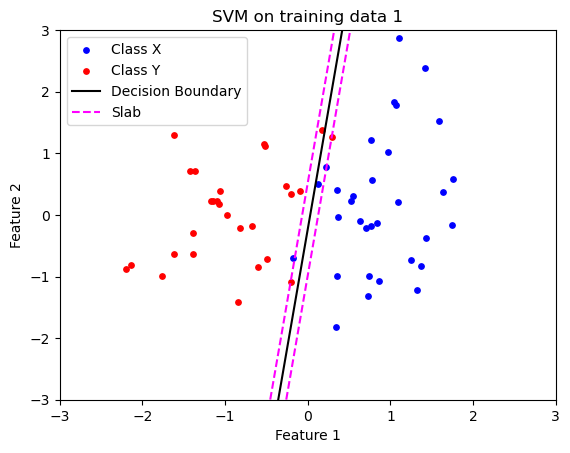

In [960]:
plot_svm(X_train_1, Y_train_1, a, b, [-3,3], [-3,3], "SVM on training data 1")

# Q2

2.   Use the test set to assess how good the classifier is on unseen data. To this end, first define a "metric" (or more than one if you prefer) which numerically quantifies how good or bad a classifier is. Explain why you picked this metric and how the metric works. **[10 marks]**


I have defined a function to calculate a bunch of metrics

- I am assuming that data in X belong ot the "True" and data in Y to the "False" classes, hence the positive negative rates

In [961]:
def calc_accuracy_metrics(X, Y, a, b):
    X_pred = (np.matmul(a.T, X.T) - b > 0).astype(int)
    Y_pred = (np.matmul(a.T, Y.T) - b < 0).astype(int)

    true_positives = np.sum(X_pred == 1) 
    true_negatives = np.sum(Y_pred == 1) 
    false_positives = np.sum(Y_pred == 0)
    false_negatives = np.sum(X_pred == 0) 
    
    accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    precision = true_positives / (true_positives + false_positives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return [accuracy,recall,precision, f1_score]

In [962]:
metrics = calc_accuracy_metrics(X_train_1, Y_train_1, a, b)
print("Train accuracy: ", metrics[0])
print("Train recall: ", metrics[1])
print("Train precision: ", metrics[2])
print("Train f1_score: ", metrics[3])
print(X_train_1.shape[0]," X samples and ", Y_train_1.shape[0], " Y samples")

Train accuracy:  0.95
Train recall:  0.96875
Train precision:  0.9393939393939394
Train f1_score:  0.9538461538461539
32  X samples and  28  Y samples


In [963]:
metrics = calc_accuracy_metrics(X_test_1, Y_test_1, a, b)
print("Test accuracy: ", metrics[0])
print("Test recall: ", metrics[1])
print("Test precision: ", metrics[2])
print("Test f1_score: ", metrics[3])
print(X_test_1.shape[0]," X samples and ", Y_test_1.shape[0], " Y samples")

Test accuracy:  0.95
Test recall:  1.0
Test precision:  0.9
Test f1_score:  0.9473684210526316
18  X samples and  22  Y samples


Metric to use

I am going to mainly use f1 score to evaluate my model's performance. The f1 score is the harmonic mean of precision ( what ratio of the stuff we label as positive is actually positive ) and recall ( what ratio of the positive values have we managed to lavel as positive).
It is especially useful when our dataset is imbalanced, which in our case it is, as there is sometimes more x and sometimes more y, so this is a good choice.

Based on the f1 metric the model performs worse on the test data (0.947 vs 0.954 originally), which is not surprising

Plot the test sets as well

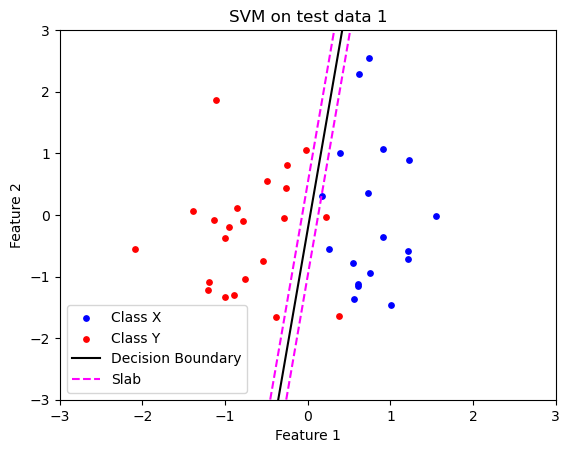

In [964]:
plot_svm(X_test_1, Y_test_1, a, b, [-3,3], [-3,3], "SVM on test data 1")

From the plot and the decreasing metric values we see that the model performs worse on the test set. Specifically there are some Y values(red) that lie in the wrong side of the decision boundary, and even outside the slab. For the train test no point was outside the slab of the opposing class.

# Q3

3.   Discuss, possibly with the help of figures, the role of the parameter $\gamma$ and find for which $\gamma$ (or $\gamma$'s) your classifier behaves best on the test set. **[10 marks]**


Our optimisation function is trying to make the width of the slab as large as possible, while minimizing erroneous classifications. Gamma parameter is the weighing we give to error minimization. Increasing gamma will result in a tighter slab and reduced misclassifications, but the model may not generalise well with unseen test data. Below I illustrate with figures the effect of gamma.
I define the best performing gamma as that which maximises the f1 score on the test set.

Below I solve the problem with gamma in the range [0,2] with steps 0.1

In [965]:
a_list = []
b_list = []
u_list = []
v_list = []
gamma_list = []
obj_values = []

for i in range(21):
    gamma = 0.1 * i

    a,b,v,u, obj = svm_classifier(X_train_1, Y_train_1, gamma) 
    
    a_list.append(a)
    b_list.append(b)
    u_list.append(u)
    v_list.append(v)
    obj_values.append(obj)
    gamma_list.append(gamma)


Calculate the f1 score of each solution with different gammas

In [966]:
f1_scores_test = []
f1_scores_train = []
for i in range(len(gamma_list)):
    f1_scores_test.append(calc_accuracy_metrics(X_test_1, Y_test_1, a_list[i], b_list[i])[3])
    f1_scores_train.append(calc_accuracy_metrics(X_train_1, Y_train_1, a_list[i], b_list[i])[3])

Plot error metrics as a function of gamma

Text(0.5, 1.0, 'F1 score vs Gamma zoomed in')

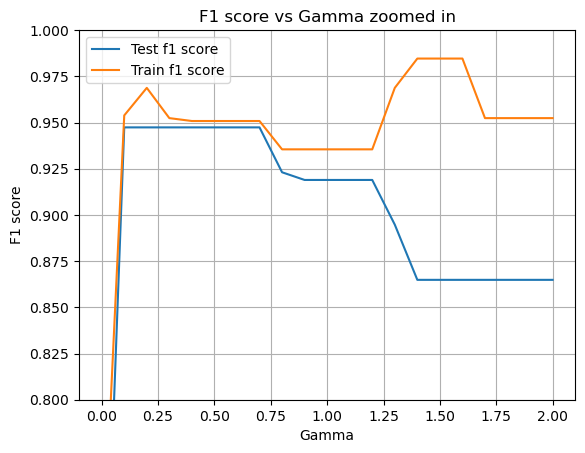

In [967]:
plt.plot(gamma_list, f1_scores_test, label='Test f1 score')
plt.plot(gamma_list, f1_scores_train, label='Train f1 score')
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('F1 score')
plt.ylim(0.8, 1.0)
plt.grid()
plt.title('F1 score vs Gamma zoomed in')

It seems the test set performs the best for a gamma value between 0.1 and 0.7, thereafter the test set performs worst and the train set performance increases up to a point.
So the optimal range of values for gamma are [0.1,0.7]

Make some plots to explain effect of gamma

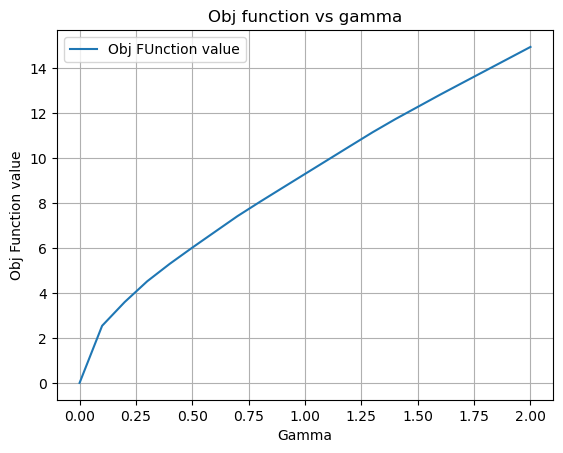

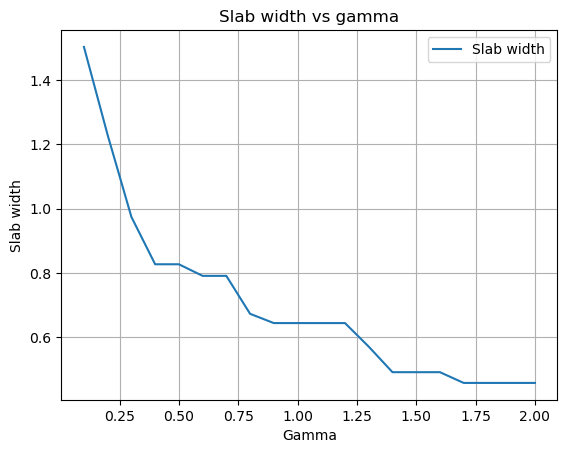

In [968]:
plt.plot(gamma_list, obj_values , label='Obj FUnction value')
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Obj Function value')
plt.title('Obj function vs gamma')
plt.grid()
plt.show()

# Now plot slab_width = 2 / np.linalg.norm(a,2) vs gamma
slab_widths = []
for i in range(len(gamma_list)):
    slab_widths.append(2 / np.linalg.norm(a_list[i],2))

plt.plot(gamma_list[1:], slab_widths[1:] , label='Slab width')
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Slab width')
plt.title('Slab width vs gamma')
plt.grid()
plt.show()


The above plots further illustrate the effect of gamma.
As gamma increases the objective function value naturally increases, because we multiply the right hand term by a higher value.
But importantly, the slab width decreases as we increase gamma ( it is extremely high for gamma=0 so I start the plot from gamma =0.1). As gamma increases the model becomes more accurate on the training dataset.

# Q4

4.   Now determine a linear classifier by approximating it via logistic modeling. Compare and discuss the results with those obtained in parts 1. 2. and 3. **[10 marks]**

Define function to do the logistic modelling

In [969]:
def logistic_modelling_classifier(X,Y):
    n_samples_x, n_features = X.shape
    n_samples_y, n_features = Y.shape

    a = cp.Variable(n_features)
    b = cp.Variable(1)

    pos_likelihood = cp.sum(a.T@X.T - b) - cp.sum(cp.logistic(a.T@X.T - b)) # Likelihood of the positive class
    neg_likelihood = - cp.sum(cp.logistic(a.T@Y.T - b)) # Likelihood of the negative class
    obj = cp.Maximize(pos_likelihood + neg_likelihood) # We want to maximize the negative log-likelihood

    constraints = [ ] # I think this is an unconstrained problem

    prob = cp.Problem(obj, constraints)
    prob.solve()
    print(prob.status)

    return a.value, b.value
    

Define function to plot our model

In [970]:
# Function to generate meshgrid
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

In [971]:
def plot_logistic_model(X,Y,a,b, xlims, ylims, title):

    # Generate a meshgrid of points to evaluate the decision boundary
    Xgrid,x1line,x2line = gen_sample_grid(100,100,xlims[1])
    Z = np.matmul(a.T, Xgrid.T) - b
    Z = Z.reshape(100,100)

    # Plot the decision boundary and the training data
    plt.contour(xx, yy, Z, levels=[0], colors='orange')
    plt.scatter(X[:, 0], X[:, 1], s=15, color='blue', label='Class X')
    plt.scatter(Y[:, 0], Y[:, 1], s=15, color='red', label='Class Y')

    # Add a legend and labels
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.xlim(xlims[0], xlims[1])
    plt.ylim(ylims[0], ylims[1])

    # Show the plot
    plt.show()

Train our model

In [972]:
a,b = logistic_modelling_classifier(X_train_1, Y_train_1)
print("a: ", a)
print("b: ", b)

optimal
a:  [17.87399377 -4.05617614]
b:  [-0.06666926]


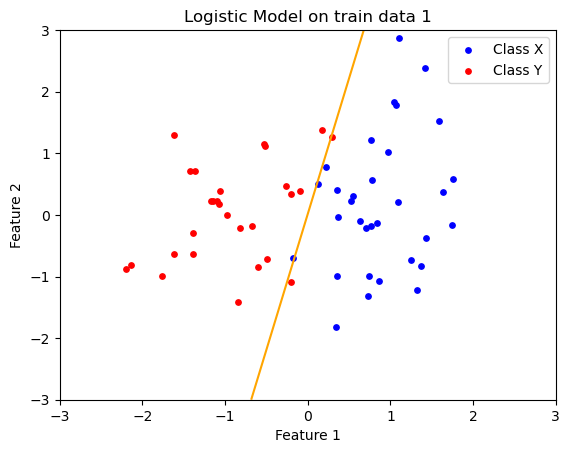

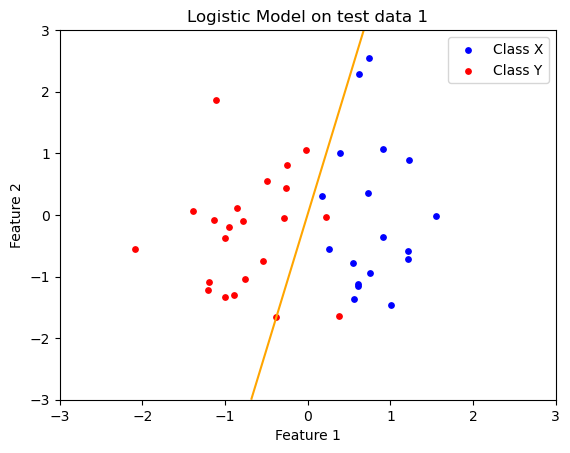

In [973]:
plot_logistic_model(X_train_1, Y_train_1, a, b, [-3,3], [-3,3], "Logistic Model on train data 1")
plot_logistic_model(X_test_1, Y_test_1, a, b, [-3,3], [-3,3], "Logistic Model on test data 1")

Get F1 Score

In [974]:
print("Train set F1 score is: ", calc_accuracy_metrics(X_train_1, Y_train_1, a, b)[3])
print("Test set F1 score is: ", calc_accuracy_metrics(X_test_1, Y_test_1, a, b)[3])

Train set F1 score is:  0.9538461538461539
Test set F1 score is:  0.9473684210526316


The F1 scores on the test and train set are identical to those we got with an SVM with gamma =0.1 above. So this model performs equally well on our data.
The decision boundary is slightly to the left of the decision boundary we got with an SVM.

# Q5

5.   For dataset $2$, determine a standard support vector classifier with $\gamma=0.1$. Plot the points, the classifier $f$ and the associated slab. Score your classifier on the test set using your metric. **[5 marks]**

a:  [1.92254686e-10 1.64473369e-10]
b:  [-1.]


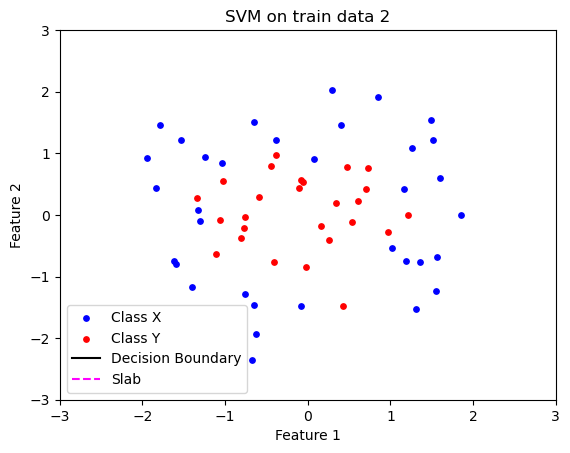

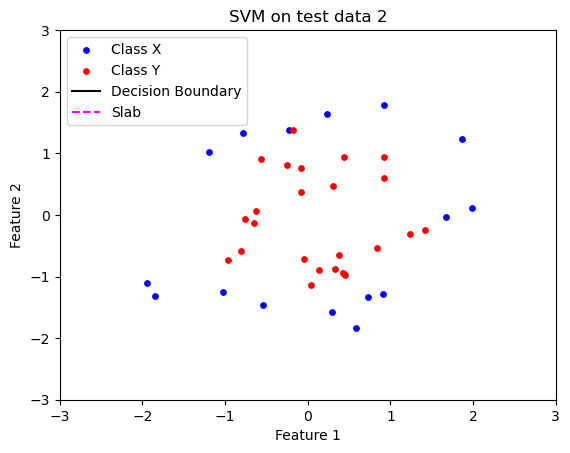

Train set F1 score is:  0.7234042553191489
Test set F1 score is:  0.5714285714285715


In [975]:
# Train the model
a,b,u,v,obj =  svm_classifier(X_train_2, Y_train_2, 0.1)
print("a: ", a)
print("b: ", b)

# Plot
plot_svm(X_train_2, Y_train_2, a, b, [-3,3], [-3,3], "SVM on train data 2")
plot_svm(X_test_2, Y_test_2, a, b, [-3,3], [-3,3], "SVM on test data 2")
# Print metrics
train_metrics =  calc_accuracy_metrics(X_train_2, Y_train_2, a, b)
print("Train set F1 score is: ", train_metrics[3])
test_metrics =  calc_accuracy_metrics(X_test_2, Y_test_2, a, b)
print("Test set F1 score is: ", test_metrics[3])

The results are a bit weird. We can see from the scatter plots above that the data is not linearly separable. The F1 score is very low.

The high intercept suggests the decision boundary is in a very weird place, so lets replot to show that.

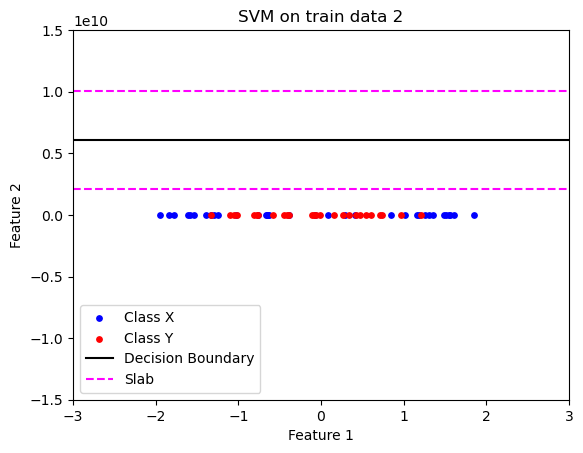

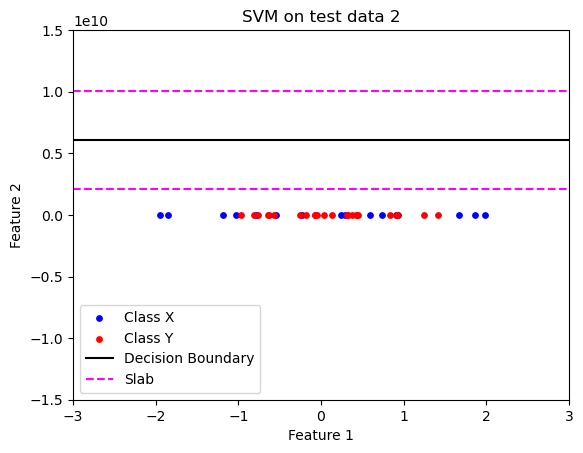

In [976]:
plot_svm(X_train_2, Y_train_2, a, b,  [-3,3],[-1.5e10,1.5e10], "SVM on train data 2")
plot_svm(X_test_2, Y_test_2, a, b, [-3,3],[-1.5e10,1.5e10], "SVM on test data 2")

It seems our decision boundary is such that it simply labels all the data as Class X(True).
This model is not fit for our linearly inseparable data

# Q6

6.   Implement nonlinear classifiers for dataset $2$. There are many options here. Discuss as much as you can and try to find the best classifier among those which are obtainable by means of convex optimisation. The more details you provide to explain how you reached your final choice, the better. **[25 marks]**

The scatter plots of the train and test data suggest we need some sort of elliptical region in the middle to house class Y. If we choose a model that aims for 100% accuracy on the train set we will get a very overfitted funky looking decision boundary that is not going to generalise well.

In the textbook it suggest we can use quadratic and polynomial discrimination, so I'll try those

#### 1. Quadratic Separator

Below is the implementation of the quadratic classifier as an sdp feasibility problem

In [977]:
def quadratic_classifier_sdp(X, Y):
    # Get dimensions
    n_samples_x, n_features = X.shape
    n_samples_y, n_features = Y.shape

    # Define variables we want to find
    P = cp.Variable((n_features, n_features))
    q = cp.Variable(n_features)
    r = cp.Variable(1)

    # Define the problem constraints
    constraints = [cp.quad_form(x, P) + q @ x.T + r >= 1  for i, x in enumerate(X)]
    constraints += [cp.quad_form(y, P) + q @ y.T + r <= -1  for i, y in enumerate(Y)]
    constraints += [P << -np.eye(n_features) ]

    # Define the problem objective
    obj = cp.Minimize(0)

    # Define the problem and solve it
    prob = cp.Problem(obj, constraints)
    print(prob.status)

    # Get the values of each variable
    return P.value,q.value,r.value, prob.status

In [978]:
P,q,r,status = quadratic_classifier_sdp(X_train_2, Y_train_2)
print(status)

None
None


This problem is infeasible, so there isn't a quadratic region that perfectly separates our train data. If we take a look at the points in the plot below we can see this is the case.

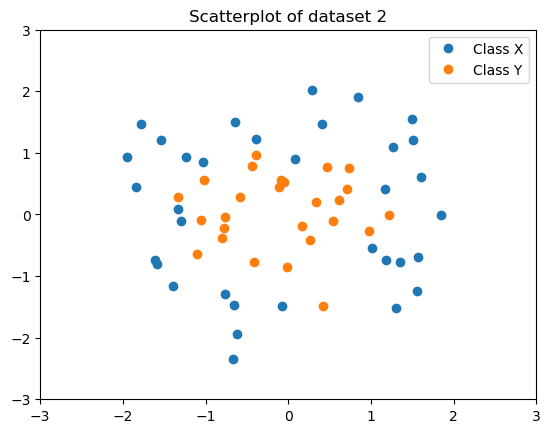

In [979]:
plt.plot(X_train_2[:,0], X_train_2[:,1], 'o', label='Class X')
plt.plot(Y_train_2[:,0], Y_train_2[:,1], 'o', label='Class Y')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.title("Scatterplot of dataset 2")
plt.legend()

Though we can see that we may roughly fit an ellipsoid that houses most Y data, and this may be a good solution if it works well with the test data as well.

So lets modify the feasilbity problem given in the book so that instead we solve an optimization problem with regularization parameter gamma just like in the svm problem above, and so we try to strike a balance between accuracy and having a wide decision region, knowing we will never completely fit our data

In [980]:
def quadratic_classifier(X, Y, gamma=0.1):
    # Get dimensions
    n_samples_x, n_features = X.shape
    n_samples_y, n_features = Y.shape

    # Define variables we want to find
    P = cp.Variable((n_features, n_features), PSD=True)
    q = cp.Variable(n_features)
    r = cp.Variable(1)
    u = cp.Variable(n_samples_x)
    v = cp.Variable(n_samples_y)

    # Define the problem constraints
    constraints = [cp.quad_form(x, P) + q @ x.T + r >= 1 - u[i] for i, x in enumerate(X)]
    constraints += [cp.quad_form(y, P) + q @ y.T + r <= -1 + v[i] for i, y in enumerate(Y)]
    constraints += [u >= 0, v >= 0]

    # Define the problem objective
    obj = cp.Minimize(cp.trace(P) + gamma * (cp.sum(u) + cp.sum(v)))

    # Define the problem and solve it
    prob = cp.Problem(obj, constraints)
    prob.solve()
    print(prob.status)

    # Get the values of each variable
    return P.value,q.value,r.value, obj.value

Define function to plot the quadratic classifier

In [981]:
Xgrid,x1line,x2line = gen_sample_grid(100,100,3)

In [982]:
def plot_quadratic_classifier(X, Y, P, q, r, xlims, ylims, title):

    # Create a meshgrid of points to evaluate the decision boundary
    Xgrid,x1line,x2line = gen_sample_grid(100,100,xlims[1])
    Z = np.zeros(10000)
    for i in range(10000):
        x = Xgrid[i]
        Z[i] = x.T @ P @ x + q @ x.T + r 
    Z = Z.reshape(100,100)

    # Plot the decision boundary and the training data
    plt.contour(xx, yy, Z, levels=[0], colors='black')
    plt.scatter(X[:, 0], X[:, 1], s=15, color='blue', label='Class X')
    plt.scatter(Y[:, 0], Y[:, 1], s=15, color='red', label='Class Y')

    # Add a legend and labels
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.xlim(xlims[0], xlims[1])
    plt.ylim(ylims[0], ylims[1])

    # Show the plot
    plt.show()


Define function to calculate accuracy metrics for the quadratic model

In [983]:
def calc_accuracy_metrics_quadratic(X, Y, P, q, r):
    X_pred = np.array([x @ P.T @ x + x @ q + r > 0 for x in X]).reshape(1,-1)[0]
    Y_pred = np.array([y @ P.T @ y + y @ q + r < 0 for y in Y]).reshape(1,-1)[0]

    true_positives = np.sum(X_pred == 1) 
    true_negatives = np.sum(Y_pred == 1) 
    false_positives = np.sum(Y_pred == 0)
    false_negatives = np.sum(X_pred == 0) 
    
    accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    precision = true_positives / (true_positives + false_positives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return [accuracy,recall,precision, f1_score]

Solve the problem and plot results, print metrics

In [984]:
P,q,r,obj = quadratic_classifier(X_train_2, Y_train_2,0.1)
print("P: ", P)
print("q: ", q)
print("r: ", r)
print("obj: ", obj)

optimal
P:  [[0.69251978 0.01022115]
 [0.01022115 0.90414202]]
q:  [ 0.08130988 -0.04110889]
r:  [-1.260683]
obj:  3.6483986364446137


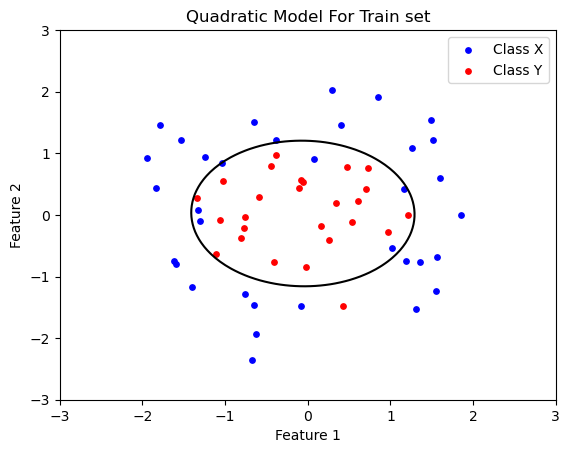

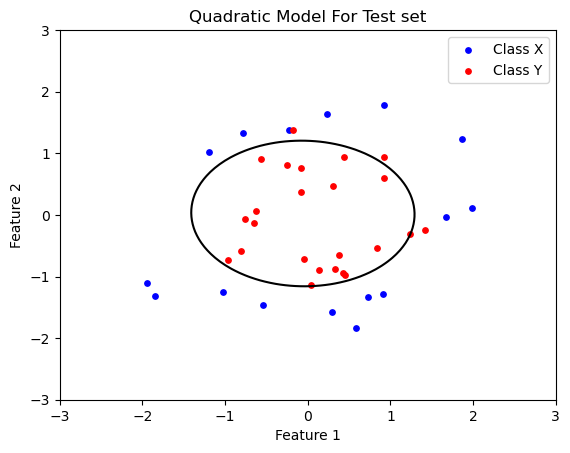

In [985]:
plot_quadratic_classifier(X_train_2, Y_train_2, P, q, r, [-3,3], [-3,3],'Quadratic Model For Train set')
plot_quadratic_classifier(X_test_2, Y_test_2, P, q, r, [-3,3], [-3,3],'Quadratic Model For Test set')

In [986]:
print("Train f1 score is: ", calc_accuracy_metrics_quadratic(X_train_2, Y_train_2, P, q, r)[3])
print("Test f1 score is: ", calc_accuracy_metrics_quadratic(X_test_2, Y_test_2, P, q, r)[3])

Train f1 score is:  0.888888888888889
Test f1 score is:  0.888888888888889


Comment: This performs fairly quite well on our data, and works well on the test set as seen in the plot, and the f1 scores are fairly high. 

#### 2. Polynomial Discrimination

The polynomial discrimination part in the textbooks explains how we can solve feasibility problems by doing a bisection on polynomial degree d, to find the minimum degree d for which a polynomial can fully fit our classification problem.

I will solve this feasibility problem, find the minimum degree d. Thereafter I will try to solve the d degree optimization problem with some regularization so that I get something that is sufficiently complex but that won't overfit the  training data.


Define function to solve feasibility problem on d

In [987]:
# Given x=2 and degree = 5, it returns a list [2,4,8,16,32]
def generate_polynomial(x,d):
    powers = np.arange(1,d+1)
    return np.array(np.power(x,powers))


def polynomial_feasibility_solver(X,Y):

    n_features = X.shape[1]

    # establish upper and lower bounds
    upper_degree = 100
    lower_degree = 1

    while lower_degree <= upper_degree: 
        mid_degree = (lower_degree + upper_degree) // 2 # set mid

        # Define variables
        a = cp.Variable((mid_degree, n_features)) # set correct shape for a
        b = cp.Variable(1)

        constraints = []

        for x in X: # add feasibility constraint for all x in X
            polynomial_1 = generate_polynomial(x[0], mid_degree) # generate polynomial for feature 1
            polynomial_2 = generate_polynomial(x[1], mid_degree) # generate polynomial for feature 2
            sum_1 = polynomial_1 @ a[:,0] # do the matrix multiplication
            sum_2 = polynomial_2 @ a[:,1]# do the matrix multiplication
            constraints.append(sum_1 + sum_2 + b >= 1) 
            # I am addind the constraints one by one like this because I couldn't figure out the syntax to add them all 
            # at once for all the datapoints

        for y in Y: # similarly add constrains for all y in Y
            polynomial_1 = generate_polynomial(y[0], mid_degree)
            polynomial_2 = generate_polynomial(y[1], mid_degree)
            sum_1 = polynomial_1 @ a[:,0] 
            sum_2 = polynomial_2 @ a[:,1]
            constraints.append(sum_1 + sum_2 + b <= -1)

        # solve problem
        objective = cp.Minimize(0)
        problem = cp.Problem(objective, constraints)
        problem.solve()
        
        print("Trying degree: ", mid_degree, " - Problem status: ", problem.status)

        # update the upper and lower bounds, and optimal values
        if problem.status == "optimal":
            upper_degree = mid_degree - 1
            a_final = a
            b_final = b
        else:
            lower_degree = mid_degree + 1

    print("The minimum degree of the polynomial is: ", lower_degree)

    return lower_degree, a_final.value, b_final.value

Define function to plot this polynomial division

In [988]:
def plot_polynomial_classifier(X,Y,a,b, degree,xlims, ylims, title):
    # Create a meshgrid of points to evaluate the decision boundary
    Xgrid,x1line,x2line = gen_sample_grid(100,100,xlims[1])
    Z = np.zeros(10000)
    for i in range(10000):
        x = Xgrid[i]
        polynomial_1 = generate_polynomial(x[0], degree)
        polynomial_2 = generate_polynomial(x[1], degree)
        Z[i] = polynomial_1 @ a[:,0] + polynomial_2 @ a[:,1] + b
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and the training data
    plt.contour(xx, yy, Z, levels=[0], colors='black')
    plt.scatter(X[:, 0], X[:, 1], s=15, color='blue', label='Class X')
    plt.scatter(Y[:, 0], Y[:, 1], s=15, color='red', label='Class Y')

    # Add a legend and labels
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.xlim(xlims[0], xlims[1])
    plt.ylim(ylims[0], ylims[1])

    # Show the plot
    plt.show()


Define function to calculate metrics

In [989]:
def calc_accuracy_metrics_polynomial(X, Y, a, b, degree):
    X_pred = []
    Y_pred = []
    
    for x in X:
        polynomial_1 = generate_polynomial(x[0], degree)
        polynomial_2 = generate_polynomial(x[1], degree)
        result =  polynomial_1 @ a[:,0]  + polynomial_2 @ a[:,1] + b > 0
        X_pred.append(result[0].astype(int))

    for y in Y:
        polynomial_1 = generate_polynomial(y[0], degree)
        polynomial_2 = generate_polynomial(y[1], degree)
        result =  polynomial_1 @ a[:,0]  + polynomial_2 @ a[:,1] + b < 0
        Y_pred.append(result[0].astype(int))


    true_positives = np.sum(X_pred) 
    true_negatives = np.sum(Y_pred) 
    false_positives = len(Y_pred) - np.sum(Y_pred)
    false_negatives = len(X_pred) - np.sum(X_pred) 
    
    accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    precision = true_positives / (true_positives + false_positives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return [accuracy,recall,precision, f1_score]

Solve feasibility problem

In [990]:
d,a,b = polynomial_feasibility_solver(X_train_2, Y_train_2)

Trying degree:  50  - Problem status:  optimal
Trying degree:  25  - Problem status:  optimal
Trying degree:  12  - Problem status:  optimal
Trying degree:  6  - Problem status:  infeasible
Trying degree:  9  - Problem status:  optimal
Trying degree:  7  - Problem status:  infeasible
Trying degree:  8  - Problem status:  optimal
The minimum degree of the polynomial is:  8


Plot results

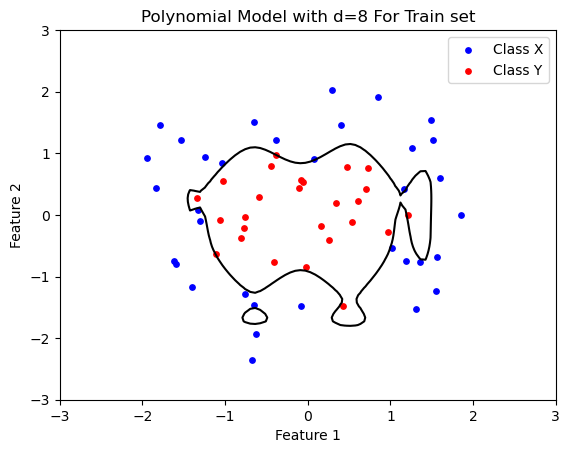

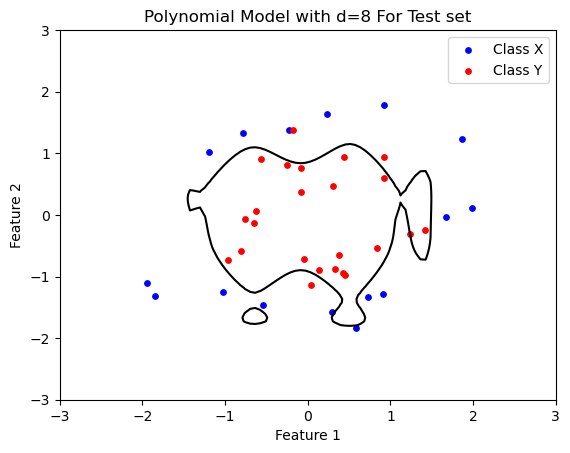

In [991]:
plot_polynomial_classifier(X_train_2, Y_train_2, a, b, d, [-3,3], [-3,3], f'Polynomial Model with d={d} For Train set')
plot_polynomial_classifier(X_test_2, Y_test_2, a, b, d, [-3,3], [-3,3], f'Polynomial Model with d={d} For Test set')

In [992]:
print("F1 Score on Training is : ", calc_accuracy_metrics_polynomial(X_train_2, Y_train_2, a, b, d)[3])
print("F1 Score on Testing is : ", calc_accuracy_metrics_polynomial(X_test_2, Y_test_2, a, b, d)[3])

F1 Score on Training is :  1.0
F1 Score on Testing is :  0.9142857142857143


The minimum feasibly polynomial for perfect classification is of degree 8. Predictably it has a perfect f1 score of 1 on the training set, falling to 0.914 on the test set.

The hyperplane (which kinda looks like a headless chicken with one leg cut off), fits the training data perfectly. 

This method outperforms our quadratic method for the test dataset as well. So for our data this is the preferable method.

However if we need to pick something to classify more unseen data I would prefer to use the quadratic one as it will probably generalize better.

#### 3. Relaxed Polynomial Classifier with lower degree

I will now try the polynomial classifier with slack variables u and v, with a degree less than the degree I found above, so that it can produce a solution without always always perfectly fit the training data.

In [993]:
def polynomial_classifier(X,Y,degree):
    # Get dimensions
    n_samples_x, n_features = X.shape
    n_samples_y, n_features = Y.shape

    # Define variables we want to find
    a = cp.Variable((degree, n_features)) # set correct shape for a
    b = cp.Variable(1)
    u = cp.Variable(n_samples_x)
    v = cp.Variable(n_samples_y)

    # Define constraints
    constraints = [u >= 0,
                    v >=0 ]
    for x in X:
        polynomial_1 = generate_polynomial(x[0], degree) 
        polynomial_2 = generate_polynomial(x[1], degree) 
        sum_1 = polynomial_1 @ a[:,0] 
        sum_2 = polynomial_2 @ a[:,1]
        constraints.append(sum_1 + sum_2 + b >= 1 - u[i]) 

    for y in Y: 
        polynomial_1 = generate_polynomial(y[0], degree)
        polynomial_2 = generate_polynomial(y[1], degree)
        sum_1 = polynomial_1 @ a[:,0] 
        sum_2 = polynomial_2 @ a[:,1]
        constraints.append(sum_1 + sum_2 + b <= -1 + v[i])


    
    # I am not entirely sure how to define the objective function, as I don't have a second parameter like slab width that I want to maximise
    # So I am just using the sum of the slack variables
    obj =  cp.Minimize( (cp.sum(u) + cp.sum(v)))
    
    problem = cp.Problem(obj, constraints)
    problem.solve()
    print(problem.status)
    
    return a.value, b.value, obj.value

Try this with degree = 7

optimal
F1 Score on Training is :  nan
F1 Score on Testing is :  nan


C:\Users\feyzi\AppData\Local\Temp\ipykernel_14020\3328182075.py:25: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positives / (true_positives + false_positives)


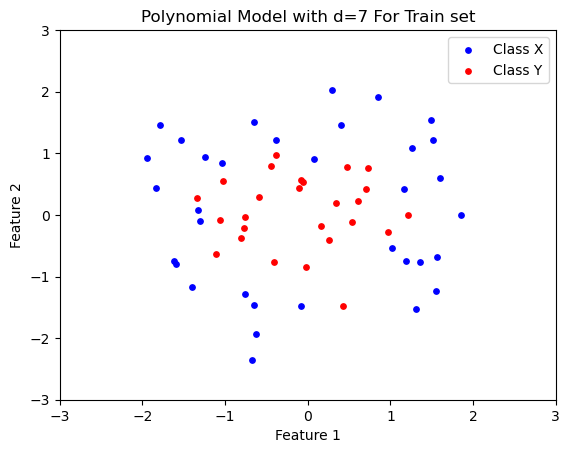

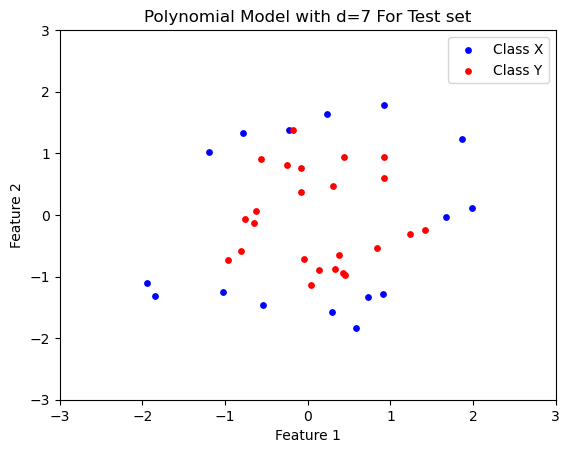

In [994]:
degree = 7
a,b,obj = polynomial_classifier(X_train_2, Y_train_2, degree)
print("F1 Score on Training is : ", calc_accuracy_metrics_polynomial(X_train_2, Y_train_2, a, b, degree)[3])
print("F1 Score on Testing is : ", calc_accuracy_metrics_polynomial(X_test_2, Y_test_2, a, b, degree)[3])
plot_polynomial_classifier(X_train_2, Y_train_2, a, b, degree, [-3,3], [-3,3],f'Polynomial Model with d={degree} For Train set')
plot_polynomial_classifier(X_test_2, Y_test_2, a, b, degree, [-3,3], [-3,3], f'Polynomial Model with d={degree} For Test set')

So no it seems lower degrees can not produce an approximate solution, at least not with the way I have formulated my problem.

I have ran the above cell with degree = 6,5,4 etc to see if I can get something that approximately fits my data, but they seem to just put all the data in one class.

Just for fun I tried to see what will happen if I increase the degree further : basically I get the same decision boundary plus some new useless decision boundaries, beacause the extra degrees have to do something. So the below solution is definetely not useful, but interesting to see.

optimal
F1 Score on Training is :  1.0
F1 Score on Testing is :  0.823529411764706


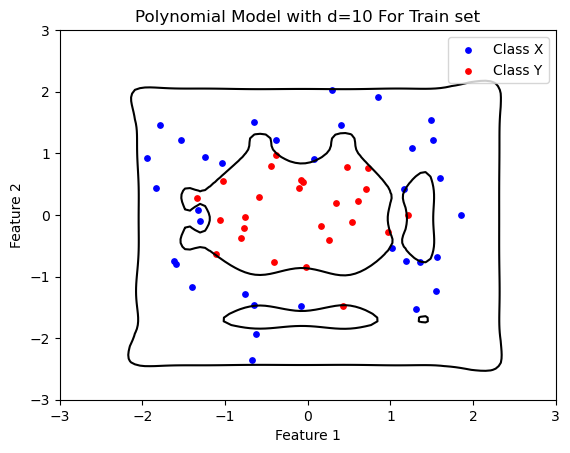

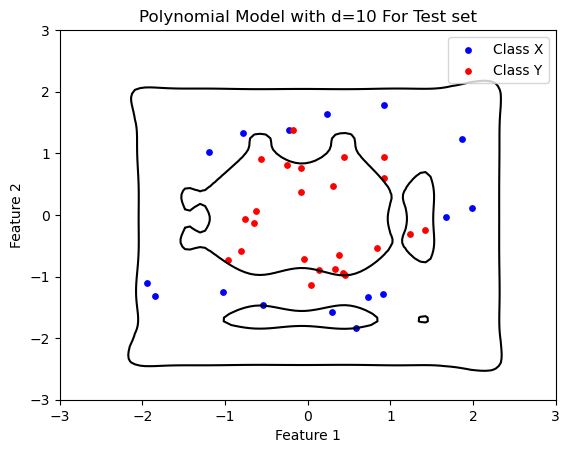

In [995]:
degree = 10
a,b,obj = polynomial_classifier(X_train_2, Y_train_2, degree)
print("F1 Score on Training is : ", calc_accuracy_metrics_polynomial(X_train_2, Y_train_2, a, b, degree)[3])
print("F1 Score on Testing is : ", calc_accuracy_metrics_polynomial(X_test_2, Y_test_2, a, b, degree)[3])
plot_polynomial_classifier(X_train_2, Y_train_2, a, b, degree, [-3,3], [-3,3],f'Polynomial Model with d={degree} For Train set')
plot_polynomial_classifier(X_test_2, Y_test_2, a, b, degree, [-3,3], [-3,3], f'Polynomial Model with d={degree} For Test set')

Does not look much like a chicken anymore

# Q7

7.   Repeat parts 5. and 6. on dataset 3. **[15 marks]**

Repeating Part 5 below

a:  [-0.53326798  0.82350359]
b:  [-0.08305511]


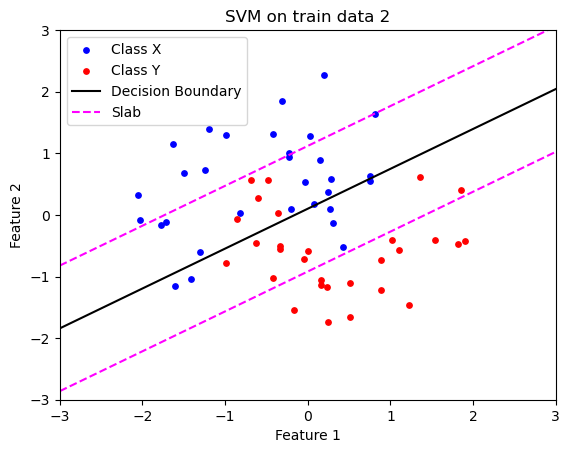

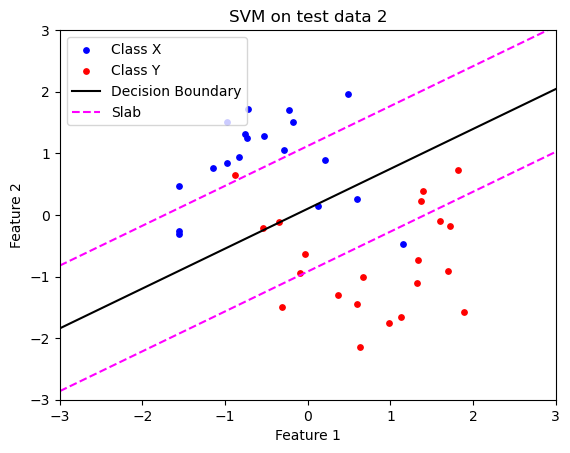

Train set F1 score is:  0.84375
Test set F1 score is:  0.8717948717948718


In [996]:
X = X_train_3
Y = Y_train_3
# Train the model
a,b,u,v,obj =  svm_classifier(X_train_3,Y_train_3, 0.1)
print("a: ", a)
print("b: ", b)
# Plot
plot_svm(X_train_3,Y_train_3, a, b, [-3,3], [-3,3], "SVM on train data 2")
plot_svm(X_test_3, Y_test_3, a, b, [-3,3], [-3,3], "SVM on test data 2")
# Metrics
train_metrics =  calc_accuracy_metrics(X_train_3, Y_train_3, a, b)
print("Train set F1 score is: ", train_metrics[3])
test_metrics =  calc_accuracy_metrics(X_test_3, Y_test_3, a, b)
print("Test set F1 score is: ", test_metrics[3])

We can see that an SVM classifier is simply not fit for purpose for this data. The F1 scores seem relatively high at 0.87, but there are obviously a lot of misclassifications and the plot makes it apparent that the data is not linearly separable.

##### Repeating Part 6

Looking at the scatter plots above it is apparent that a polynomial separator will perform better than a quadratic one, because we can't really group one of the classes inside an ellipsis. Still I will perform both methods so we can compare.

#### 1.Quadratic Separator

Implement and evaluate quadratic separation - a perfect separation will be infeasible

optimal
P:  [[-7.03149124e-07 -8.89960271e-07]
 [-8.89960271e-07  4.25594799e-07]]
q:  [-0.88076285  1.74201838]
r:  [0.21503935]
obj:  2.5352130617523896


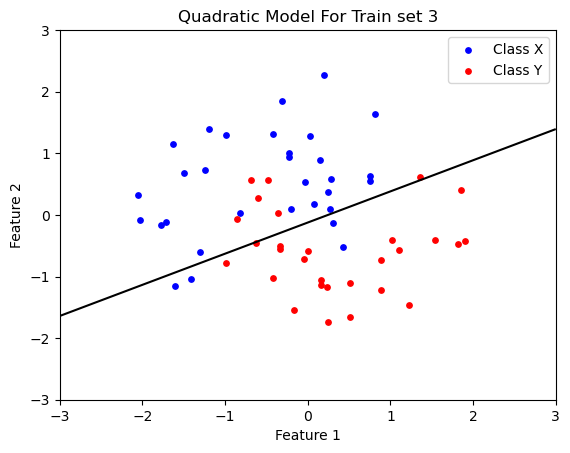

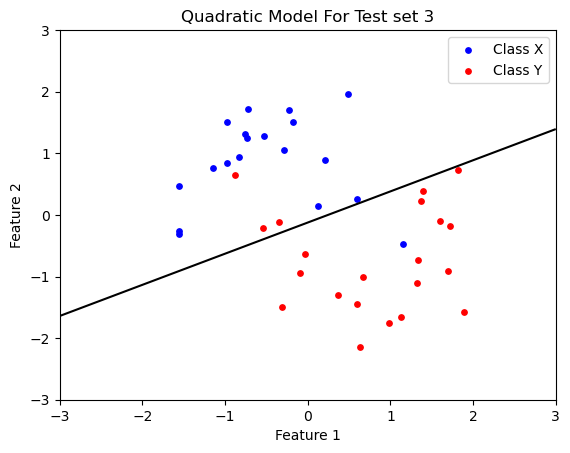

Train f1 score is:  0.84375
Test f1 score is:  0.9


In [997]:
# Train the model
P,q,r,obj = quadratic_classifier(X_train_3, Y_train_3,0.1)
print("P: ", P)
print("q: ", q)
print("r: ", r)
print("obj: ", obj)
xlims = [-3,3]
ylims = [-3,3]
# Plot
plot_quadratic_classifier(X_train_3, Y_train_3, P, q, r, xlims, ylims,'Quadratic Model For Train set 3')
plot_quadratic_classifier(X_test_3, Y_test_3, P, q, r,xlims, ylims,'Quadratic Model For Test set 3')
# Metrics
print("Train f1 score is: ", calc_accuracy_metrics_quadratic(X_train_3, Y_train_3, P, q, r)[3])
print("Test f1 score is: ", calc_accuracy_metrics_quadratic(X_test_3, Y_test_3, P, q, r)[3])

The quadratic model performs no better than the linear SVM, altough its test f1 score is higher than before, this is just due to the decision boundary being slightly different. It is still a linear separator. 

#### 2. Minimum Degree Polynomial Classifier

Trying degree:  50  - Problem status:  optimal
Trying degree:  25  - Problem status:  optimal
Trying degree:  12  - Problem status:  optimal
Trying degree:  6  - Problem status:  optimal
Trying degree:  3  - Problem status:  optimal
Trying degree:  1  - Problem status:  infeasible
Trying degree:  2  - Problem status:  infeasible
The minimum degree of the polynomial is:  3
Performance metrics:
F1 Score on Training is :  1.0
F1 Score on Testing is :  0.9473684210526315


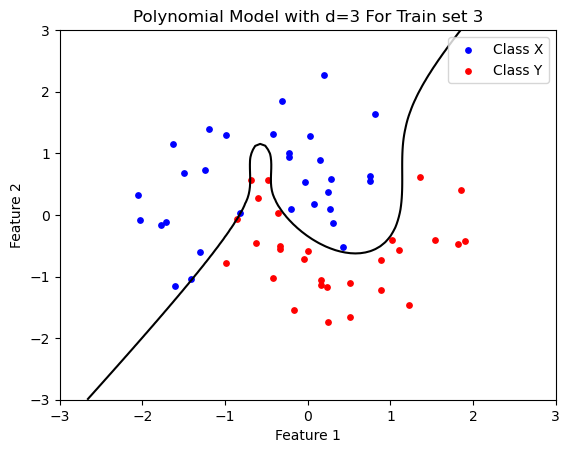

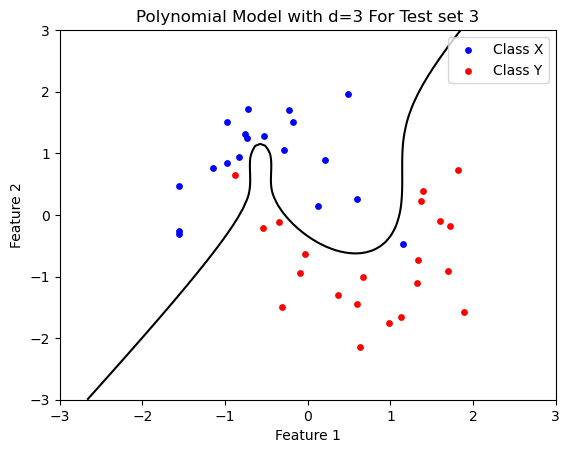

In [998]:
# Solve problem
d,a,b = polynomial_feasibility_solver(X_train_3, Y_train_3)
# Metrics
print("Performance metrics:")
print("F1 Score on Training is : ", calc_accuracy_metrics_polynomial(X_train_3, Y_train_3, a, b, d)[3])
print("F1 Score on Testing is : ", calc_accuracy_metrics_polynomial(X_test_3, Y_test_3, a, b, d)[3])
# Plots
plot_polynomial_classifier(X_train_3, Y_train_3, a, b, d, [-3,3], [-3,3],f'Polynomial Model with d={d} For Train set 3')
plot_polynomial_classifier(X_test_3, Y_test_3, a, b, d, [-3,3], [-3,3],f'Polynomial Model with d={d} For Test set 3')

Now that's more like it! No chickens this time either. The degree 3 polynomial fits our test data very well, with a high f1 score. Visually we can see it captures the separation between X and Y quite well

# Q8

8.   Dataset $4$ consists of three sets of points corresponding to three classes instead of two. Explain how you would go about finding a classifier for this case. Try to find a classifier and plot the points and the classifiers. Describe your results. **[15 marks]**

Lets look at the points first


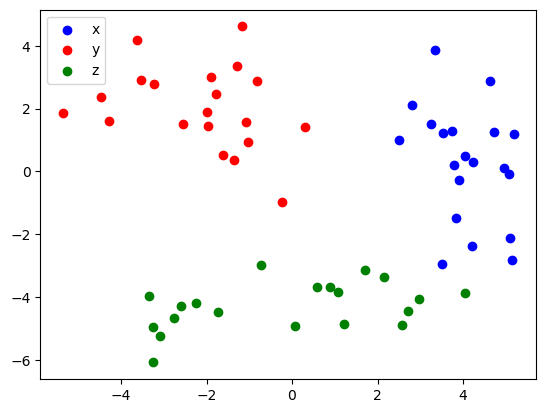

In [999]:
# Scatter plot the fourth dataset X_4, Y_4, Z_4
plt.scatter(X_4[:,0], X_4[:,1], c="blue", label ="x")
plt.scatter(Y_4[:,0], Y_4[:,1], c="red", label ="y")
plt.scatter(Z_4[:,0], Z_4[:,1], c="green", label ="z")
plt.legend()
plt.show()

It looks like I can roughly split the space into three and get a perfect classifier. What I'll do is train three classifiers in a One vs All fashion:
- Classifier 1: X is class 1, Y and Z are class 0
- Classifier 2:  Y is class 1, X and Y are class 0
- Classifier 3:  Z is class 1, X and Z are class 0

I will then split the graph above into regions according to which classifier has the highest value. So if a point lies in the region where classifier 1 has the highest value, it will be classified as X, and so on.


Get the three classifiers

In [1000]:
P_x, q_x, r_x, obj_x = quadratic_classifier(X_4, np.vstack((Y_4, Z_4)), gamma=0.1)
P_y, q_y, r_y, obj_y = quadratic_classifier(Y_4, np.vstack((X_4, Z_4)), gamma=0.1)
P_z, q_z, r_z, obj_z = quadratic_classifier(Z_4, np.vstack((X_4, Y_4)), gamma=0.1)

optimal
optimal
optimal


Generate meshgrid and calculate values

In [1001]:
Xgrid,x1line,x2line = gen_sample_grid(100,100,10)
X = Xgrid

X_pred = np.array([x @ P_x.T @ x + x @ q_x + r_x for x in X]).reshape(1,-1)[0]
Y_pred = np.array([x @ P_y.T @ x + x @ q_y + r_y for x in X]).reshape(1,-1)[0]
Z_pred = np.array([x @ P_z.T @ x + x @ q_z + r_z for x in X]).reshape(1,-1)[0]

# Stack all the prediction values side by side
all_vals = np.column_stack((X_pred, Y_pred, Z_pred))
# Pick the highest class value
max_idx = np.argmax(all_vals, axis=1)
max_idx = max_idx.reshape(100,100)

Plot

Text(0.5, 1.0, 'One vs All Quadratic Classifier')

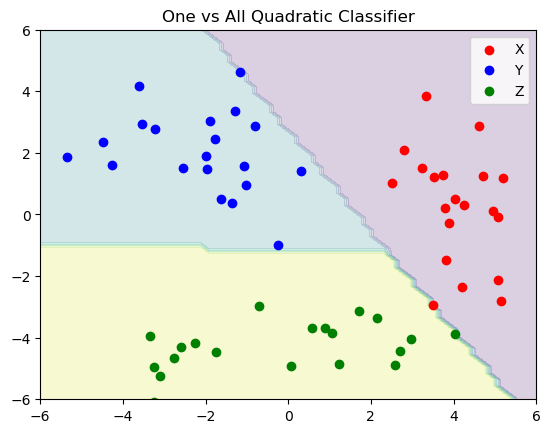

In [1002]:
plt.contourf(x1line, x2line, max_idx, alpha=0.2)
plt.scatter(X_4[:,0], X_4[:,1], c='r', label='X')
plt.scatter(Y_4[:,0], Y_4[:,1], c='b', label='Y')
plt.scatter(Z_4[:,0], Z_4[:,1], c='g', label='Z')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.legend()
plt.title('One vs All Quadratic Classifier')

As we can see by the plot this is sufficiently good to perfectly separate all our data. We may employ higher order polynomials to get decision hyperplanes with more round fits, but this seems to work well enough.
 
It has an accuracy of 100%, I can't calculate the F1 score because it has three classes.